In [168]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer


In [169]:
# Load dataset into a dataframe
decantalo = pd.read_csv(r"data\scrapped\decantalo_listings.csv")
decantalo.head()

,rating,num_review,wine_type,size (cL),name,price,country,abv,year,url
0,4.9,52,white,75.0,Enate Chardonnay 234,10.55,Spain,13.5,2021.0,https://www.decantalo.com/uk/en/enate-chardonn...
1,4.8,26,white,75.0,José Pariente Verdejo,11.33,Spain,13.0,2021.0,https://www.decantalo.com/uk/en/jose-pariente-...
2,4.8,15,white,75.0,The Flower and the Bee,10.85,Spain,13.0,2021.0,https://www.decantalo.com/uk/en/the-flower-and...
3,5.0,2,white,75.0,Can Sumoi Xarel·lo,13.64,Spain,14.0,2021.0,https://www.decantalo.com/uk/en/can-sumoi-xare...
4,4.8,6,white,75.0,Martín Codax Albariño,13.73,Spain,12.0,2021.0,https://www.decantalo.com/uk/en/martin-codax-a...


In [170]:
# Rename the column name for convenience
decantalo.rename(columns={"size (cL)" : "size"}, inplace=True)

In [171]:
# Check types of all variables
decantalo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7259 entries, 0 to 7258
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rating      7259 non-null   float64
 1   num_review  7259 non-null   int64  
 2   wine_type   7259 non-null   object 
 3   size        7128 non-null   float64
 4   name        7259 non-null   object 
 5   price       7259 non-null   object 
 6   country     7216 non-null   object 
 7   abv         7244 non-null   float64
 8   year        6863 non-null   float64
 9   url         7259 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 567.2+ KB


In [172]:
# Check for na values
decantalo.isna().any()

rating        False
num_review    False
wine_type     False
size           True
name          False
price         False
country        True
abv            True
year           True
url           False
dtype: bool

In [173]:
# Count NA values
decantalo.isna().sum()

rating          0
num_review      0
wine_type       0
size          131
name            0
price           0
country        43
abv            15
year          396
url             0
dtype: int64

In [174]:
# Check number of unique values in all columns
decantalo.nunique()

rating          19
num_review      43
wine_type        7
size             4
name          6498
price         1533
country         21
abv             96
year            25
url           7247
dtype: int64

array([4.9, 4.8, 5. , 4.4, 0. , 4.7, 4.5, 4.2, 4.6, 4. , 3. , 3.5, 3.8,
       4.3, 2. , 4.1, 1. , 3.7, 3.9])

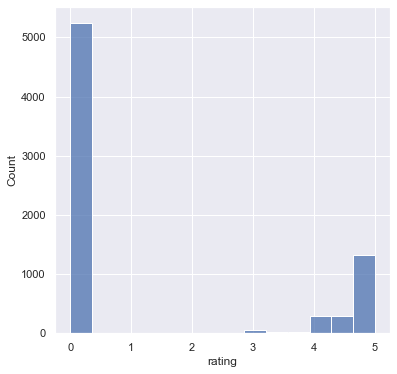

In [175]:
# Histogram plots for rating
sns.set(rc={"figure.figsize":(6,6)})

sns.histplot(decantalo["rating"])
decantalo["rating"].unique()

array([52, 26, 15,  2,  6, 23, 25,  8, 14,  0,  7, 11,  9,  1, 18,  3, 34,
        4, 16, 12,  5, 19, 13, 10, 21, 17, 27, 31, 47, 44, 22, 35, 78, 94,
       57, 30, 73, 33, 40, 20, 24, 38, 50], dtype=int64)

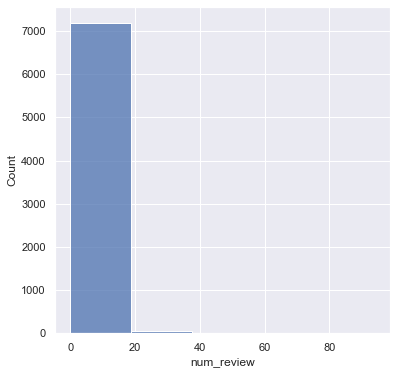

In [176]:
# Histogram plots for number of reviews
sns.set(rc={"figure.figsize":(6,6)})

sns.histplot(decantalo["num_review"], kde=False, bins=5)
decantalo["num_review"].unique()

array(['white', 'rose', 'fortified and sherry', 'red', 'sweet', 'orange',
       'vermouth'], dtype=object)

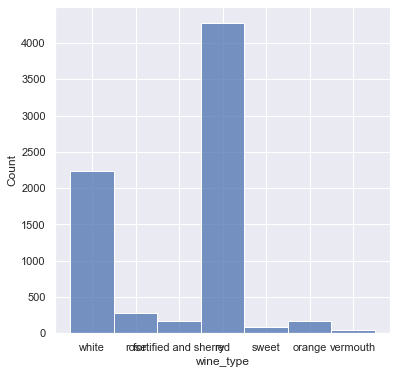

In [177]:
# Histogram plots for wine type
sns.set(rc={"figure.figsize":(6,6)})

sns.histplot(decantalo["wine_type"])
decantalo["wine_type"].unique()

array([75., 50., 62., nan, 70.])

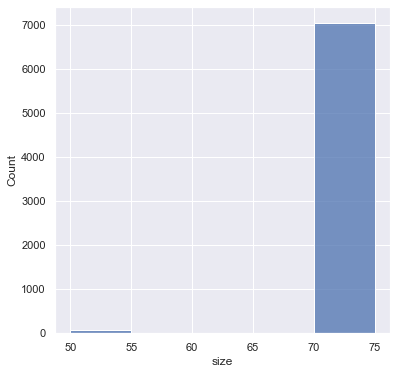

In [178]:
# Histogram plots for size
sns.set(rc={"figure.figsize":(6,6)})

sns.histplot(decantalo["size"], kde=False, bins=5)
decantalo["size"].unique()

In [179]:
# As info showed that price is of type object, it indicates there might be non-numerical values in it. 
# Converting the column to float and any non numeric value to Nan. We will handle Nan later
decantalo["price"] = decantalo["price"].apply(pd.to_numeric, errors = "coerce")
decantalo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7259 entries, 0 to 7258
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rating      7259 non-null   float64
 1   num_review  7259 non-null   int64  
 2   wine_type   7259 non-null   object 
 3   size        7128 non-null   float64
 4   name        7259 non-null   object 
 5   price       5828 non-null   float64
 6   country     7216 non-null   object 
 7   abv         7244 non-null   float64
 8   year        6863 non-null   float64
 9   url         7259 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 567.2+ KB


In [180]:
# Fix missing countries to unknown value
decantalo["country"].fillna("unknown" , inplace=True)
decantalo["country"].unique()

array(['Spain', 'France', 'Portugal', 'Italy', 'Germany', 'Argentina',
       'Greece', 'unknown', 'South Africa', 'Austria', 'Hungary',
       'Slovenia', 'Chile', 'New Zealand', 'Croatia', 'United States',
       'Australia', 'Peru', 'Uruguay', 'Lebanon', 'Israel',
       'Czech Republic'], dtype=object)

<AxesSubplot:xlabel='abv', ylabel='Count'>

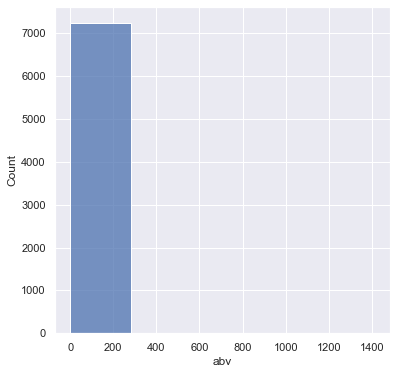

In [181]:
# Histogram plot of ABV

sns.set(rc={"figure.figsize":(6,6)})

sns.histplot(decantalo["abv"], kde=False,bins=5)



In [182]:
decantalo.describe()
# max value of abv doesn't make sense 
# DRopping abv values above 100

indices = decantalo[decantalo["abv"] > 100].index
decantalo.drop(indices, inplace=True)

# checking if the value is removed
decantalo.describe()

# Compute % of missing values
decantalo["abv"].isna().sum()/len(decantalo["abv"])*100

# As the % of missing values is very small, we will drop the rows having abv value as NA
decantalo.dropna(subset = ["abv"], inplace=True)

decantalo["abv"].isna().sum()




0

<AxesSubplot:xlabel='year', ylabel='Count'>

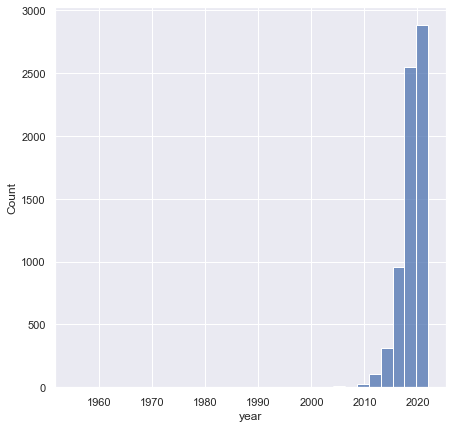

In [183]:
# Histogram plot of year

decantalo["year"].isna().sum()/len(decantalo["year"])*100
sns.set(rc={"figure.figsize":(7,7)})

sns.histplot(decantalo["year"], bins=30)

# As only 5% is missing, we will keep it as is and can use other column values for analysis 






In [184]:
# Feature Engineering

decantalo = decantalo.reset_index()

# Find age
decantalo.loc[:, "age"] = 2022 - decantalo["year"]

# # one hot encoding of wine_type (after merge)
# pd.get_dummies(decantalo, drop_first=True, columns=["wine_type"])

# Creating a column with ratings >5
for i, num in enumerate(decantalo["num_review"]):
    if num > 5:
        decantalo.loc[i, "score"] = decantalo.loc[i, "rating"]
    else:
        decantalo.loc[i, "score"] = 0




In [185]:
# Impute size to most frequent value

impute = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
decantalo[["size"]]=impute.fit_transform(decantalo[["size"]])


# To scale size
for i, size in enumerate(decantalo["size"]):
    decantalo.loc[i, "scaledprice"] = decantalo.loc[i, "price"] * 75 / size

decantalo.loc[decantalo["size"] != 75, ["size", "price", "scaledprice"]]

# Creating a new column log price as it is skewed
decantalo.loc[:, "logprice"] = np.log10(decantalo.loc[:,"scaledprice"])





c:\Users\Soumya\anaconda3\Anaconda\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [186]:
# creating country codes
import pycountry

# create a dict f country name and their codes 
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

decantalo["countrycode"] = [countries.get(c, "unknown") for c in decantalo["country"]]
decantalo.head()

,index,rating,num_review,wine_type,size,name,price,country,abv,year,url,age,score,scaledprice,logprice,countrycode
0,0,4.9,52,white,75.0,Enate Chardonnay 234,10.55,Spain,13.5,2021.0,https://www.decantalo.com/uk/en/enate-chardonn...,1.0,4.9,10.55,1.023252,ESP
1,1,4.8,26,white,75.0,José Pariente Verdejo,11.33,Spain,13.0,2021.0,https://www.decantalo.com/uk/en/jose-pariente-...,1.0,4.8,11.33,1.054230,ESP
2,2,4.8,15,white,75.0,The Flower and the Bee,10.85,Spain,13.0,2021.0,https://www.decantalo.com/uk/en/the-flower-and...,1.0,4.8,10.85,1.035430,ESP
3,3,5.0,2,white,75.0,Can Sumoi Xarel·lo,13.64,Spain,14.0,2021.0,https://www.decantalo.com/uk/en/can-sumoi-xare...,1.0,0.0,13.64,1.134814,ESP
4,4,4.8,6,white,75.0,Martín Codax Albariño,13.73,Spain,12.0,2021.0,https://www.decantalo.com/uk/en/martin-codax-a...,1.0,4.8,13.73,1.137671,ESP


<AxesSubplot:>

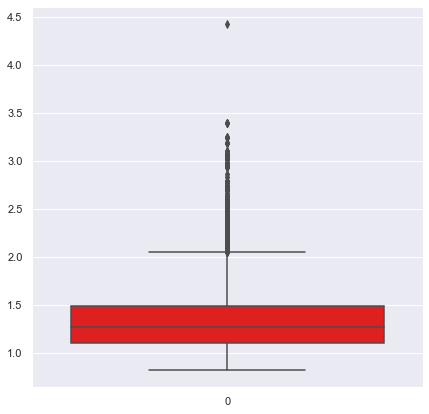

In [187]:
# price visualisation (log plot of price as the data is skewed)
sns.set(rc={"figure.figsize":(7,7)})

sns.boxplot(data=np.log10(decantalo["scaledprice"]), color= "red")


<AxesSubplot:xlabel='Count', ylabel='country'>

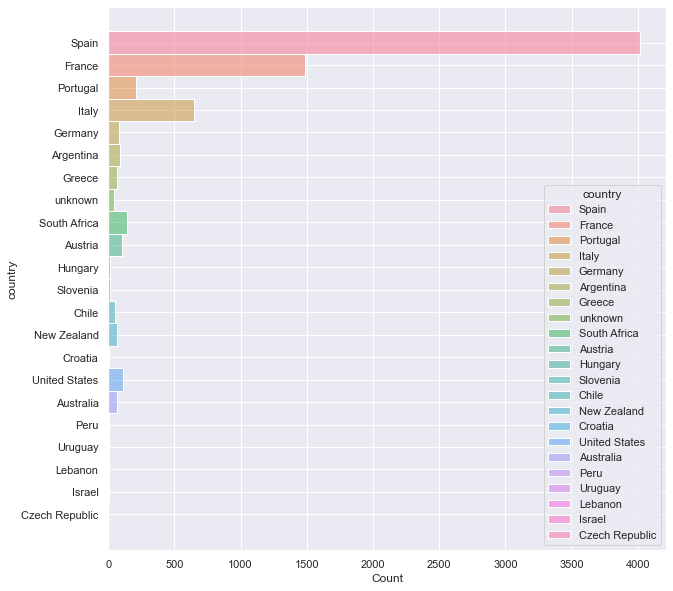

In [188]:
# Countries visualisation
sns.set(rc={"figure.figsize":(10,10)})

sns.histplot(data=decantalo, y="country", hue="country")


<AxesSubplot:xlabel='wine_type', ylabel='logprice'>

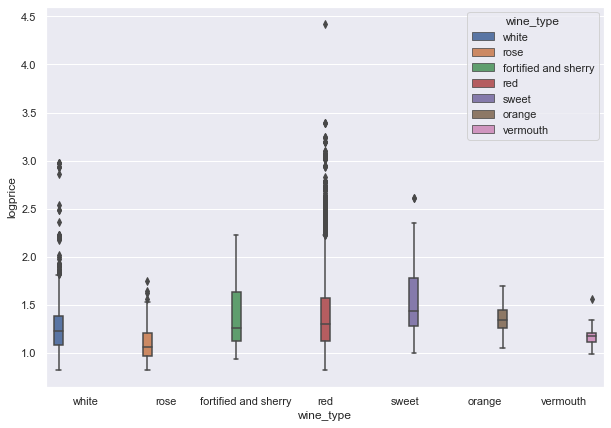

In [189]:
# plot wine type vs price

sns.set(rc={"figure.figsize":(10,7)})

sns.boxplot(
    data=decantalo,
    x="wine_type", y="logprice", hue="wine_type"
)

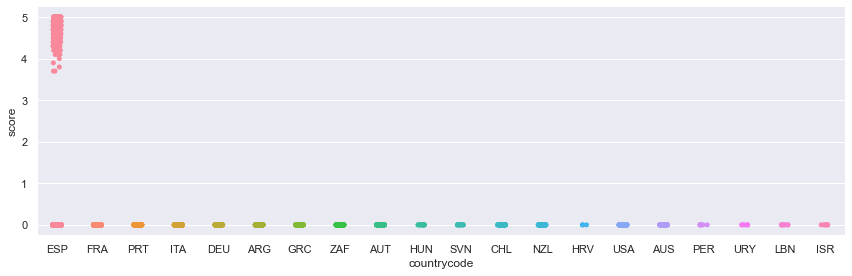

In [190]:
# plot country vs review ratings

sns.catplot(data=decantalo.loc[decantalo["countrycode"]!="unknown"], x="countrycode", y="score", height=4, aspect=3)

Text(0.5, 0, 'LogPrice')

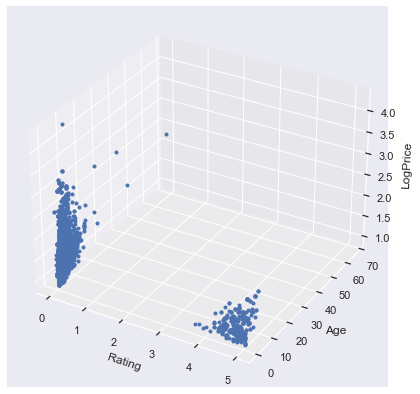

In [191]:
# Plot log price vs age and rating

from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(decantalo["score"], decantalo["age"], decantalo["logprice"], '.')
ax.set_xlabel("Rating")
ax.set_ylabel("Age")
ax.set_zlabel("LogPrice")

In [192]:
# Plot top 5 frequent years
topyear =decantalo.loc[:, "year"].value_counts().sort_values(ascending=False)
top =topyear.iloc[0:5]
topy =pd.DataFrame({'year':top.index, 'count':top.values})
topy




,year,count
0,2020.0,1527
1,2019.0,1484
2,2021.0,1338
3,2018.0,1064
4,2017.0,604


<AxesSubplot:xlabel='year', ylabel='count'>

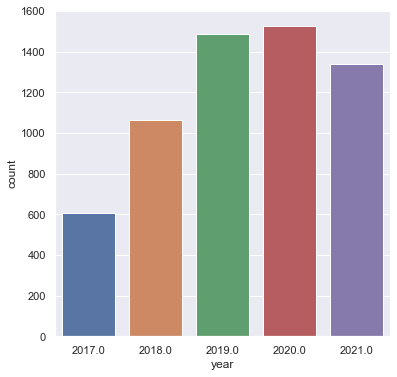

In [193]:
sns.set(rc={"figure.figsize":(6,6)})
sns.barplot(data=topy, x= "year", y = "count")



In [194]:
decantalo

,index,rating,num_review,wine_type,size,name,price,country,abv,year,url,age,score,scaledprice,logprice,countrycode
0,0,4.9,52,white,75.0,Enate Chardonnay 234,10.55,Spain,13.5,2021.0,https://www.decantalo.com/uk/en/enate-chardonn...,1.0,4.9,10.55,1.023252,ESP
1,1,4.8,26,white,75.0,José Pariente Verdejo,11.33,Spain,13.0,2021.0,https://www.decantalo.com/uk/en/jose-pariente-...,1.0,4.8,11.33,1.054230,ESP
2,2,4.8,15,white,75.0,The Flower and the Bee,10.85,Spain,13.0,2021.0,https://www.decantalo.com/uk/en/the-flower-and...,1.0,4.8,10.85,1.035430,ESP
3,3,5.0,2,white,75.0,Can Sumoi Xarel·lo,13.64,Spain,14.0,2021.0,https://www.decantalo.com/uk/en/can-sumoi-xare...,1.0,0.0,13.64,1.134814,ESP
4,4,4.8,6,white,75.0,Martín Codax Albariño,13.73,Spain,12.0,2021.0,https://www.decantalo.com/uk/en/martin-codax-a...,1.0,4.8,13.73,1.137671,ESP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7238,7254,5.0,2,vermouth,75.0,Punt E Mes Vermouth,16.82,unknown,16.0,NaN,https://www.decantalo.com/uk/en/punt-e-mes-ver...,NaN,0.0,16.82,1.225826,unknown
7239,7255,0.0,0,vermouth,75.0,El Bandarra blanco,14.03,Spain,15.0,NaN,https://www.decantalo.com/uk/en/el-bandarra-bl...,NaN,0.0,14.03,1.147058,ESP
7240,7256,5.0,1,vermouth,75.0,Vermouth Belsazar Dry,19.26,unknown,19.0,NaN,https://www.decantalo.com/uk/en/vermouth-belsa...,NaN,0.0,19.26,1.284656,unknown
7241,7257,5.0,2,vermouth,75.0,Vermut El Bandarra,14.03,Spain,15.0,NaN,https://www.decantalo.com/uk/en/vermut-el-band...,NaN,0.0,14.03,1.147058,ESP


In [195]:
# Rename the column name for convenience
decantalo.rename(columns={"size" : "size(cL)", "scaledprice" : "scaled_price" }, inplace=True)
decantalo

,index,rating,num_review,wine_type,size(cL),name,price,country,abv,year,url,age,score,scaled_price,logprice,countrycode
0,0,4.9,52,white,75.0,Enate Chardonnay 234,10.55,Spain,13.5,2021.0,https://www.decantalo.com/uk/en/enate-chardonn...,1.0,4.9,10.55,1.023252,ESP
1,1,4.8,26,white,75.0,José Pariente Verdejo,11.33,Spain,13.0,2021.0,https://www.decantalo.com/uk/en/jose-pariente-...,1.0,4.8,11.33,1.054230,ESP
2,2,4.8,15,white,75.0,The Flower and the Bee,10.85,Spain,13.0,2021.0,https://www.decantalo.com/uk/en/the-flower-and...,1.0,4.8,10.85,1.035430,ESP
3,3,5.0,2,white,75.0,Can Sumoi Xarel·lo,13.64,Spain,14.0,2021.0,https://www.decantalo.com/uk/en/can-sumoi-xare...,1.0,0.0,13.64,1.134814,ESP
4,4,4.8,6,white,75.0,Martín Codax Albariño,13.73,Spain,12.0,2021.0,https://www.decantalo.com/uk/en/martin-codax-a...,1.0,4.8,13.73,1.137671,ESP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7238,7254,5.0,2,vermouth,75.0,Punt E Mes Vermouth,16.82,unknown,16.0,NaN,https://www.decantalo.com/uk/en/punt-e-mes-ver...,NaN,0.0,16.82,1.225826,unknown
7239,7255,0.0,0,vermouth,75.0,El Bandarra blanco,14.03,Spain,15.0,NaN,https://www.decantalo.com/uk/en/el-bandarra-bl...,NaN,0.0,14.03,1.147058,ESP
7240,7256,5.0,1,vermouth,75.0,Vermouth Belsazar Dry,19.26,unknown,19.0,NaN,https://www.decantalo.com/uk/en/vermouth-belsa...,NaN,0.0,19.26,1.284656,unknown
7241,7257,5.0,2,vermouth,75.0,Vermut El Bandarra,14.03,Spain,15.0,NaN,https://www.decantalo.com/uk/en/vermut-el-band...,NaN,0.0,14.03,1.147058,ESP


In [196]:
decantalo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7243 entries, 0 to 7242
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         7243 non-null   int64  
 1   rating        7243 non-null   float64
 2   num_review    7243 non-null   int64  
 3   wine_type     7243 non-null   object 
 4   size(cL)      7243 non-null   float64
 5   name          7243 non-null   object 
 6   price         5819 non-null   float64
 7   country       7243 non-null   object 
 8   abv           7243 non-null   float64
 9   year          6855 non-null   float64
 10  url           7243 non-null   object 
 11  age           6855 non-null   float64
 12  score         7243 non-null   float64
 13  scaled_price  5819 non-null   float64
 14  logprice      5819 non-null   float64
 15  countrycode   7243 non-null   object 
dtypes: float64(9), int64(2), object(5)
memory usage: 905.5+ KB


In [197]:
Decantlo = decantalo[["name","country","wine_type", "year", "scaled_price", "score", "num_review","abv", "age", "size(cL)", "logprice" ]]
Decantlo.head()

,name,country,wine_type,year,scaled_price,score,num_review,abv,age,size(cL),logprice
0,Enate Chardonnay 234,Spain,white,2021.0,10.55,4.9,52,13.5,1.0,75.0,1.023252
1,José Pariente Verdejo,Spain,white,2021.0,11.33,4.8,26,13.0,1.0,75.0,1.054230
2,The Flower and the Bee,Spain,white,2021.0,10.85,4.8,15,13.0,1.0,75.0,1.035430
3,Can Sumoi Xarel·lo,Spain,white,2021.0,13.64,0.0,2,14.0,1.0,75.0,1.134814
4,Martín Codax Albariño,Spain,white,2021.0,13.73,4.8,6,12.0,1.0,75.0,1.137671


In [198]:
Decantlo.to_csv("clean_Decantlo.csv")